In [86]:
import cv2   
import numpy as np   
import matplotlib.pyplot as plt
import imutils

In [155]:
coordinates = []
def click_event(event, x, y, flags, params):
  
    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:
  
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
  
        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img, str(x) + ',' +
                    str(y), (x,y), font,
                    1, (255, 0, 0), 2)
        cv2.imshow('image', img)
        coordinates.append([x,y])
  
    # checking for right mouse clicks     
    if event==cv2.EVENT_RBUTTONDOWN:
  
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
  
        # displaying the coordinates
        # on the image window
        font = cv2.FONT_HERSHEY_SIMPLEX
        b = img[y, x, 0]
        g = img[y, x, 1]
        r = img[y, x, 2]
        cv2.putText(img, str(b) + ',' +
                    str(g) + ',' + str(r),
                    (x,y), font, 1,
                    (255, 255, 0), 2)
        cv2.imshow('image', img)
        coordinates.append([x,y])

In [156]:
fileName = 'vis_Bakul_002_000970.png'
imgDirPath = 'F:\\IIIT-H Work\\win_det_heatmaps\\rrcServerData\\templateMatching\\images\\resnet\\'
imgPath = imgDirPath + fileName
# Reading the main image   
img = cv2.imread(imgPath,1)
img_rgb = np.copy(img)

335   395
340   507
496   505
494   394


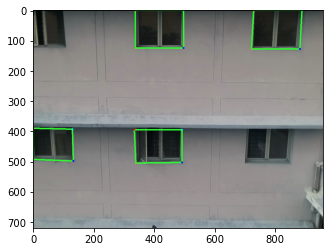

In [157]:
plt.figure()
plt.imshow(img)
cv2.imshow('image', img)

# setting mouse hadler for the image
# and calling the click_event() function
cv2.setMouseCallback('image', click_event)

# wait for a key to be pressed to exit
cv2.waitKey(0)

# close the window
cv2.destroyAllWindows()

In [138]:
print(coordinates)

[[336, 396], [341, 507], [494, 504], [496, 395]]


In [139]:
coordinates[0]

[336, 396]

In [158]:
# Loop through list to find range of x and y

def calculateRange(coordinates):
    minX = maxX = coordinates[0][0]
    minY = maxY = coordinates[0][1]
    for i in range(len(coordinates)):
        if minX > coordinates[i][0]:
            minX = coordinates[i][0]
        if maxX < coordinates[i][0]:
            maxX = coordinates[i][0]

        if minY > coordinates[i][1]:
            minY = coordinates[i][1]
        if maxY < coordinates[i][1]:
            maxY = coordinates[i][1]
    return minX, maxX, minY, maxY

335 496 394 507


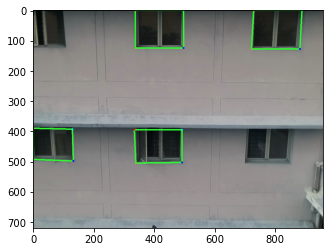

In [159]:
minX, maxX, minY, maxY = calculateRange(coordinates)
padding = 10
plt.imshow(img_rgb)
print(minX, maxX, minY, maxY)

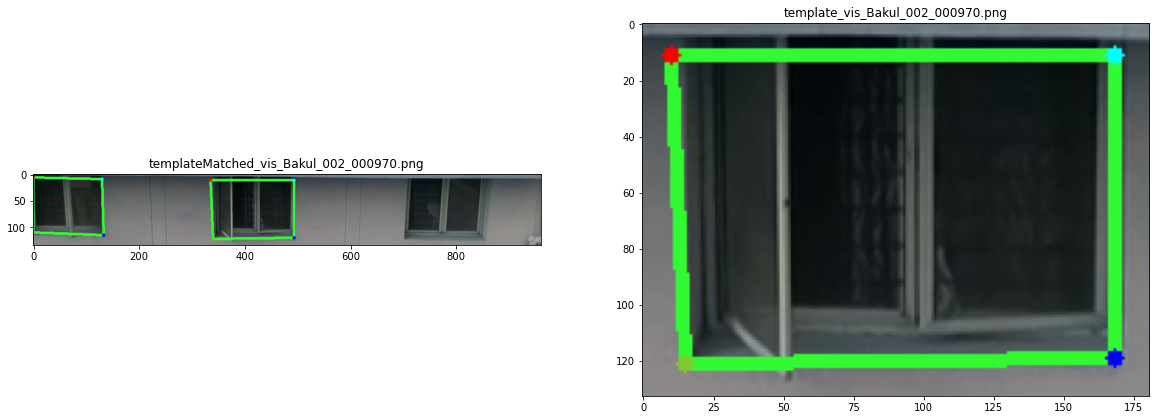

In [160]:
template = img_rgb[minY - padding:maxY + padding, minX - padding:maxX + padding, :]
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 2)
plt.imshow(template)
plt.title('template_' + str(fileName)) 
searchImg = img_rgb[minY - padding:maxY + padding, : ,:]
plt.subplot(1, 2, 1)
plt.imshow(searchImg)
plt.title('templateMatched_' + str(fileName)) 
plt.show()

Text(0.5, 1.0, 'rotatedTemplate_vis_Bakul_002_000970.png')

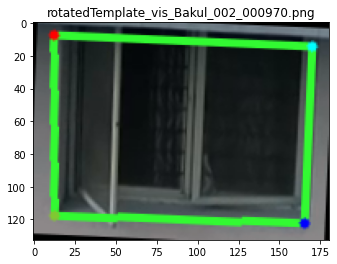

In [161]:
# Apply rotation and shear to template
rotatedTemplate = imutils.rotate(template, -2.5)
plt.imshow(rotatedTemplate)
plt.title('rotatedTemplate_' + str(fileName)) 

Text(0.5, 1.0, 'Result on search Image')

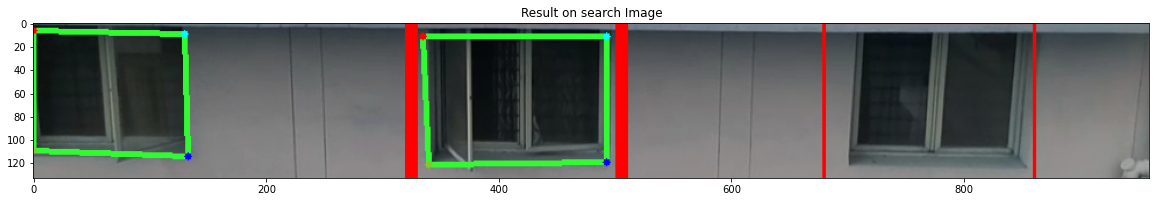

In [166]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)   
template_gray = cv2.cvtColor(rotatedTemplate, cv2.COLOR_BGR2GRAY)   
searchImg_gray = cv2.cvtColor(searchImg, cv2.COLOR_BGR2GRAY)

# Store width in variable w and height in variable h of template  
w, h = template_gray.shape[::-1]   
# Now we perform match operations.   
res = cv2.matchTemplate(searchImg_gray,template_gray,cv2.TM_CCOEFF_NORMED)   
# Declare a threshold   
threshold = 0.55
# Store the coordinates of matched region in a numpy array   
loc = np.where( res >= threshold)   
# Draw a rectangle around the matched region.   
for pt in zip(*loc[::-1]):   
    cv2.rectangle(searchImg, pt, (pt[0] + w, pt[1] + h), (255,0,0), 1)   
# Now display the final matched template image   
plt.figure(figsize=(20,10))
plt.imshow(searchImg)  
plt.title('Result on search Image')
#cv2.imwrite('Template_' +  '0.6_threshold_' + fileName, template)
#cv2.imwrite('TemplateMatched_'  + '0.6_threshold_' + fileName, searchImg)